<h2>Regression Basics </h2>
The idea is: 
Build the model
-> Train the model
-> Make predictions 

We will be using simple linear regression in pytorch to make predictions <br>
The model architecture is 
$y = mx + b$ 

In [163]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


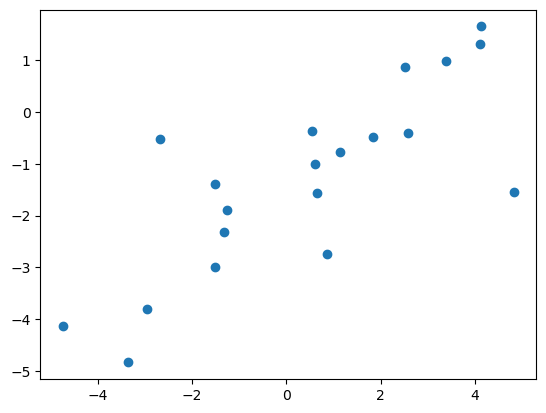

In [7]:
# Create Random Data points:
N = 20 #for creating 20 data points
X = np.random.random(N)*10-5 # for creating random data on the x-axis in (-5,+5)
Y = 0.5*X -1 + np.random.randn(N) #A line plus some noise 

#Plot the Data: 
plt.scatter(X,Y)

In [9]:
#Building the model:
model = nn.Linear(1,1) #Linear model with input size 1 and output size 1
#Training the model:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #using stochastic gradient descent with learning rate 0.1
X = X.reshape(N,1) # because we want our data to be of shape (numberOfSamples,numberOfDimensions) 
Y = Y.reshape(N,1) 
inputs = torch.from_numpy(X.astype(np.float32)) #converting from float64(default for numpy) to float32(default for pyTorch) 
targets = torch.from_numpy(Y.astype(np.float32)) #the conversion turns the numpy arrays into torch tensors 
print(type(inputs))

<class 'torch.Tensor'>


Epoch 1/30, Loss:  1.1776
Epoch 2/30, Loss:  1.1776
Epoch 3/30, Loss:  1.1776
Epoch 4/30, Loss:  1.1776
Epoch 5/30, Loss:  1.1776
Epoch 6/30, Loss:  1.1776
Epoch 7/30, Loss:  1.1776
Epoch 8/30, Loss:  1.1776
Epoch 9/30, Loss:  1.1776
Epoch 10/30, Loss:  1.1776
Epoch 11/30, Loss:  1.1776
Epoch 12/30, Loss:  1.1776
Epoch 13/30, Loss:  1.1776
Epoch 14/30, Loss:  1.1776
Epoch 15/30, Loss:  1.1776
Epoch 16/30, Loss:  1.1776
Epoch 17/30, Loss:  1.1776
Epoch 18/30, Loss:  1.1776
Epoch 19/30, Loss:  1.1776
Epoch 20/30, Loss:  1.1776
Epoch 21/30, Loss:  1.1776
Epoch 22/30, Loss:  1.1776
Epoch 23/30, Loss:  1.1776
Epoch 24/30, Loss:  1.1776
Epoch 25/30, Loss:  1.1776
Epoch 26/30, Loss:  1.1776
Epoch 27/30, Loss:  1.1776
Epoch 28/30, Loss:  1.1776
Epoch 29/30, Loss:  1.1776
Epoch 30/30, Loss:  1.1776


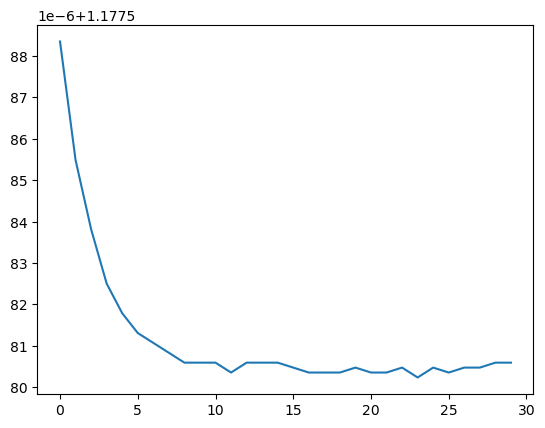

In [16]:
#Training the model 
n_epochs = 30 
losses = [] #a list to keep the loss so that we can plot it later
for i in range (n_epochs):
    optimizer.zero_grad() #zeroes the parameter gradients. pytorch is accumulating the gradients each time backward is called and zeroing prevents this
    #forward pass
    outputs = model(inputs) #model is an object instantiated by nn.Linear(1,1)
    loss = criterion(outputs,targets) #criterion is an object instantiated by nn.MSELoss()
    losses.append(loss.item()) # keeping the loss. Loss is a single python number in tensor btw hence we use the item function
    #Backward and optimize 
    loss.backward() #backward is an encapsulated function that calculates the gradient using the loss tensor
    optimizer.step() #does one step of gradient descent 

    print(f'Epoch {i+1}/{n_epochs}, Loss: {loss.item(): .4f}')

plt.plot(losses)
    

In [20]:
#Make Predictions
predicted = model(inputs).detach().numpy() #gives us the predicted y hat
print(predicted)
print(predicted.shape)

[[-1.2153435 ]
 [-2.8872728 ]
 [ 0.25501597]
 [ 0.631971  ]
 [-3.958301  ]
 [-0.19562745]
 [ 0.6276263 ]
 [-0.5518818 ]
 [-2.1514845 ]
 [-1.1706558 ]
 [-1.1914606 ]
 [-2.1876948 ]
 [ 0.9948548 ]
 [-3.034502  ]
 [-1.0544279 ]
 [-2.2913253 ]
 [-2.2864559 ]
 [-0.1651895 ]
 [-3.244112  ]
 [-0.91322684]]
(20, 1)


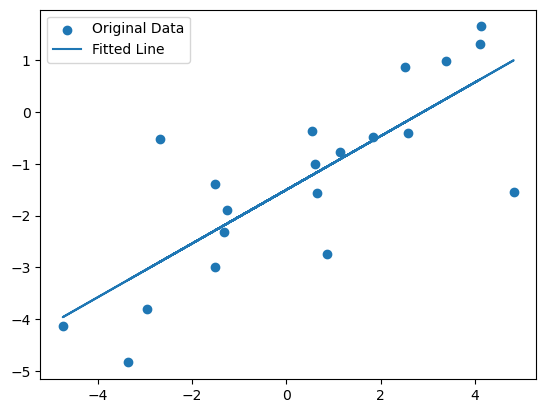

In [24]:
#Plot the graphs:
plt.scatter(X,Y, label = 'Original Data')
plt.plot(X, predicted, label = 'Fitted Line')
plt.legend()
plt.show()

In [26]:
#another way:
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-1.2153435 ],
       [-2.8872728 ],
       [ 0.25501597],
       [ 0.631971  ],
       [-3.958301  ],
       [-0.19562745],
       [ 0.6276263 ],
       [-0.5518818 ],
       [-2.1514845 ],
       [-1.1706558 ],
       [-1.1914606 ],
       [-2.1876948 ],
       [ 0.9948548 ],
       [-3.034502  ],
       [-1.0544279 ],
       [-2.2913253 ],
       [-2.2864559 ],
       [-0.1651895 ],
       [-3.244112  ],
       [-0.91322684]], dtype=float32)

In [28]:
#finding accuracy where true values of (m,b) are (0.5,-1) which are also known as weights(w) and bias(b). They are model parameters
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.51844954]] [-1.5018729]


<h2> Moore's Law: </h2>

In [70]:
import pandas as pd
data = pd.read_csv('moore.csv').values
print(data)
print(type(data))

[[       1972        3500]
 [       1973        2500]
 [       1973        2500]
 [       1974        4100]
 [       1974        4500]
 [       1974        8000]
 [       1975        3510]
 [       1976        5000]
 [       1976        8500]
 [       1976        6500]
 [       1978        9000]
 [       1978       29000]
 [       1979       17500]
 [       1979       29000]
 [       1979       68000]
 [       1981       11500]
 [       1982       55000]
 [       1982      134000]
 [       1983       22000]
 [       1984       63000]
 [       1984      190000]
 [       1985      275000]
 [       1985       25000]
 [       1985       16000]
 [       1986      110000]
 [       1986      375000]
 [       1986       30000]
 [       1987      385000]
 [       1987      730000]
 [       1987      273000]
 [       1987      553000]
 [       1988      180000]
 [       1988      250000]
 [       1989      600000]
 [       1989     1000000]
 [       1989     1180235]
 [       1989      310000]
 

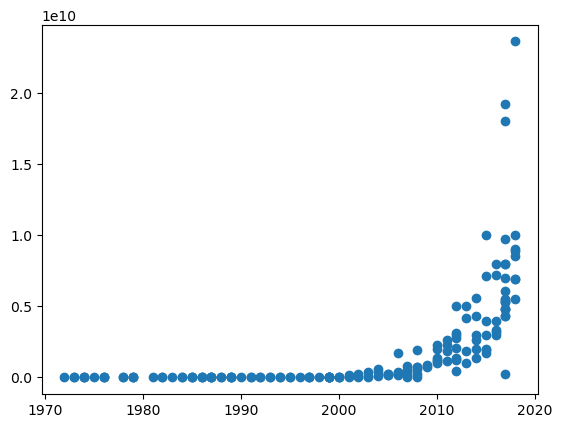

In [90]:
X = data[:,0].reshape(-1,1) #not reshaping to 2D matrix will give error during training
Y = data[:,1].reshape(-1,1)
plt.scatter(X,Y)

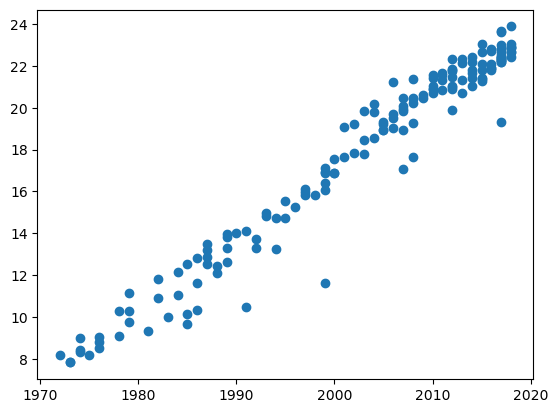

In [91]:
Y = np.log(Y) #since data is exponential we want to use log scale to figure out a linear relationship
plt.scatter(X,Y)

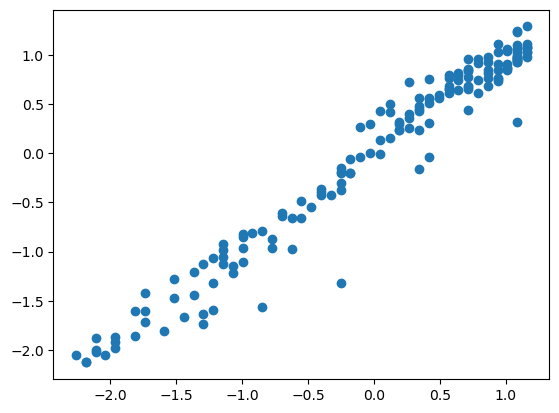

In [92]:
#Data Preprocessing
meanX = X.mean()
stdX = X.std()
meanY = Y.mean()
stdY = Y.std()
X = (X - meanX)/stdX #Standardizing the data
Y = (Y - meanY)/stdY
plt.scatter(X,Y)

In [93]:
#Building the model
X = X.astype(np.float32) # Cast to float 32
Y = Y.astype(np.float32)
model = nn.Linear(1,1) # Create the Linear Regression Model
criterion = nn.MSELoss() #Loss
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7) #Optimizer where momentum is one of the variations on gradient descent

inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)
print(type(inputs))

<class 'torch.Tensor'>


In [94]:
#Training the model:
n_epochs = 100 
losses = [] #a list to keep the loss so that we can plot it later
for i in range (n_epochs):
    optimizer.zero_grad() #zeroes the parameter gradients. pytorch is accumulating the gradients each time backward is called and zeroing prevents this
    #forward pass
    outputs = model(inputs) #model is an object instantiated by nn.Linear(1,1)
    loss = criterion(outputs,targets) #criterion is an object instantiated by nn.MSELoss()
    losses.append(loss.item()) # keeping the loss. Loss is a single python number in tensor btw hence we use the item function
    #Backward and optimize 
    loss.backward() #backward is an encapsulated function that calculates the gradient using the loss tensor
    optimizer.step() #does one step of gradient descent 

    print(f'Epoch {i+1}/{n_epochs}, Loss: {loss.item(): .4f}')


Epoch 1/100, Loss:  2.0938
Epoch 2/100, Loss:  2.0124
Epoch 3/100, Loss:  1.8795
Epoch 4/100, Loss:  1.7181
Epoch 5/100, Loss:  1.5453
Epoch 6/100, Loss:  1.3726
Epoch 7/100, Loss:  1.2076
Epoch 8/100, Loss:  1.0545
Epoch 9/100, Loss:  0.9156
Epoch 10/100, Loss:  0.7917
Epoch 11/100, Loss:  0.6824
Epoch 12/100, Loss:  0.5870
Epoch 13/100, Loss:  0.5044
Epoch 14/100, Loss:  0.4333
Epoch 15/100, Loss:  0.3724
Epoch 16/100, Loss:  0.3204
Epoch 17/100, Loss:  0.2762
Epoch 18/100, Loss:  0.2388
Epoch 19/100, Loss:  0.2071
Epoch 20/100, Loss:  0.1803
Epoch 21/100, Loss:  0.1577
Epoch 22/100, Loss:  0.1387
Epoch 23/100, Loss:  0.1227
Epoch 24/100, Loss:  0.1093
Epoch 25/100, Loss:  0.0980
Epoch 26/100, Loss:  0.0885
Epoch 27/100, Loss:  0.0806
Epoch 28/100, Loss:  0.0739
Epoch 29/100, Loss:  0.0683
Epoch 30/100, Loss:  0.0636
Epoch 31/100, Loss:  0.0597
Epoch 32/100, Loss:  0.0564
Epoch 33/100, Loss:  0.0536
Epoch 34/100, Loss:  0.0513
Epoch 35/100, Loss:  0.0494
Epoch 36/100, Loss:  0.0478
E

Text(0, 0.5, 'Loss')

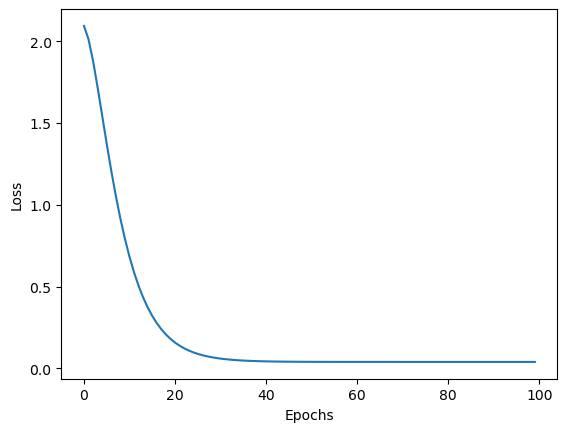

In [114]:
#plotting loss por iteration
plt.plot(losses) # Confirming Loss has converged!! 
plt.xlabel("Epochs")
plt.ylabel("Loss")

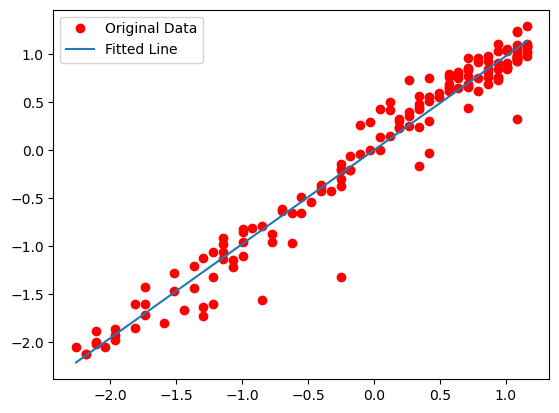

In [116]:
predicted = model(inputs).detach().numpy()
plt.plot(X,Y, 'ro', label = "Original Data")
plt.plot(X, predicted, label = "Fitted Line")
plt.legend()
plt.show()

In [122]:
#Getting the trained weights of the modeL:
w = model.weight.data.numpy()
print(w)
m = w[0,0]*(stdY/stdX)
print(m)

[[0.9797983]]
0.3422693006276412


<h2> Linear Classifier </h2>

<b>Some Theory:</b>
- Accuracy = $ \frac{correctPredictions}{totalPredictions}$

The steps would be 
1) X,Y = get_data() --- load the data
2) model = MyLinearClassifier() --- instantiate the model
3) model.fit(X,Y) --- train model
4) model.predict(X_test) --- make predictions
5) model.score(X,Y) --- evaluate accuracy

In [147]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [149]:
#load the data
data = load_breast_cancer()
print(type(data)) #a bunch object which basically acts like a dictionary where one can treat the keys like attributes/Features 
print(data.keys())
print(data.data.shape)
print(data.target.shape)
print(data.data)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
(569,)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [143]:
print(data.target) #1D array of 0s and 1s
print(data.target_names) #their meaning is not lost 
print(data.feature_names) #see the meaning of each feature
print(type(data.data)) # this is an array

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [235]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape # keeping the dimensions might come in handy
print(N,D)
print(type(X_train))

#Scale the data
scaler = StandardScaler() #we want to scale our data since output is a linear combination of input, hence we don't want huge discrepancy
X_train = scaler.fit_transform(X_train) # in the range of the input sets. This is essentially normalizing the data as this will make the value
X_test = scaler.transform(X_test) # of w better
print(type(X_train))

381 30
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [237]:
#Build the model:
model = nn.Sequential(nn.Linear(D,1), nn.Sigmoid())
criterion = nn.BCELoss() #Binary Cross Entropy Loss 
optimizer = torch.optim.Adam(model.parameters()) #adam optimizer 

In [239]:
#Convert the data into torch tensors
print(type(X_train))
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))
print(type(X_train))


<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [241]:
#Train the model
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
    optimizer.zero_grad()
    #Forward pass
    outputs = model(X_train)
    loss = criterion(outputs,y_train)
    #backward and optimize
    loss.backward()
    optimizer.step()
    #Get test loss
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)
    #save losses 
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()

    if (i+1)%50 == 0:
        print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item()}')
        
    

Epoch 50/1000, Train Loss: 0.5747, Test Loss: 0.588554322719574
Epoch 100/1000, Train Loss: 0.4127, Test Loss: 0.4259728789329529
Epoch 150/1000, Train Loss: 0.3237, Test Loss: 0.33764058351516724
Epoch 200/1000, Train Loss: 0.2686, Test Loss: 0.28330597281455994
Epoch 250/1000, Train Loss: 0.2315, Test Loss: 0.24677962064743042
Epoch 300/1000, Train Loss: 0.2050, Test Loss: 0.2206091433763504
Epoch 350/1000, Train Loss: 0.1851, Test Loss: 0.20093603432178497
Epoch 400/1000, Train Loss: 0.1697, Test Loss: 0.18558749556541443
Epoch 450/1000, Train Loss: 0.1573, Test Loss: 0.17325681447982788
Epoch 500/1000, Train Loss: 0.1473, Test Loss: 0.16311469674110413
Epoch 550/1000, Train Loss: 0.1389, Test Loss: 0.15461093187332153
Epoch 600/1000, Train Loss: 0.1317, Test Loss: 0.14736653864383698
Epoch 650/1000, Train Loss: 0.1256, Test Loss: 0.1411120593547821
Epoch 700/1000, Train Loss: 0.1203, Test Loss: 0.13565057516098022
Epoch 750/1000, Train Loss: 0.1156, Test Loss: 0.13083484768867493
E

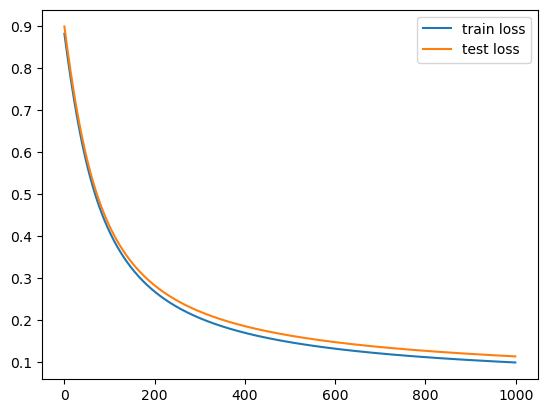

In [243]:
#Plot the train loss and test loss per iteration:
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [245]:
#Get accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9843, Test acc: 0.9574


In [247]:
#Plot the accuracy too 
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

NameError: name 'r' is not defined

<h2> Save and Load Model </h2>


In [250]:
#Look at the state dict:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2258, -0.3263, -0.2498, -0.1603, -0.1007, -0.2573, -0.2441, -0.2760,
                       -0.0249,  0.4534, -0.5458, -0.0267, -0.2598, -0.5429,  0.0271,  0.0396,
                        0.0557, -0.3794,  0.3588,  0.5744, -0.3658, -0.3316, -0.2111, -0.2302,
                       -0.4466, -0.2854, -0.3410, -0.3776, -0.4609, -0.3588]])),
             ('0.bias', tensor([0.3448]))])

In [252]:
#Save the model
torch.save(model.state_dict(), 'mymodel1.pt')

In [262]:
#Load the model
model2 = nn.Sequential(nn.Linear(D,1), nn.Sigmoid())
model2.load_state_dict(torch.load('mymodel1.pt'))

<All keys matched successfully>

In [ ]:
#Downloading the model on google colab
"""
from google.colab import files
files.download('mymodel1.pt')
"""

<h2> Modeling with Logits </h2>

In [267]:
#Build the model:
model = nn.Linear(D,1)
criterion = nn.BCEWithLogitsLoss() #Binary Cross Entropy Loss calculated directly from the logits
optimizer = torch.optim.Adam(model.parameters()) #adam optimizer 

In [ ]:
#Convert the data into torch tensors
print(type(X_train))
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))
print(type(X_train))


In [269]:
#Train the model
n_epochs = 1000
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
    optimizer.zero_grad()
    #Forward pass
    outputs = model(X_train)
    loss = criterion(outputs,y_train)
    #backward and optimize
    loss.backward()
    optimizer.step()
    #Get test loss
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)
    #save losses 
    train_losses[i] = loss.item()
    test_losses[i] = loss_test.item()

    if (i+1)%50 == 0:
        print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item()}')
        
    

Epoch 50/1000, Train Loss: 0.4576, Test Loss: 0.4644854664802551
Epoch 100/1000, Train Loss: 0.3400, Test Loss: 0.34540292620658875
Epoch 150/1000, Train Loss: 0.2744, Test Loss: 0.27997493743896484
Epoch 200/1000, Train Loss: 0.2320, Test Loss: 0.23787705600261688
Epoch 250/1000, Train Loss: 0.2024, Test Loss: 0.20845003426074982
Epoch 300/1000, Train Loss: 0.1808, Test Loss: 0.18689346313476562
Epoch 350/1000, Train Loss: 0.1646, Test Loss: 0.1705702543258667
Epoch 400/1000, Train Loss: 0.1519, Test Loss: 0.15784905850887299
Epoch 450/1000, Train Loss: 0.1418, Test Loss: 0.1476767212152481
Epoch 500/1000, Train Loss: 0.1335, Test Loss: 0.13935942947864532
Epoch 550/1000, Train Loss: 0.1265, Test Loss: 0.1324290782213211
Epoch 600/1000, Train Loss: 0.1206, Test Loss: 0.1265614926815033
Epoch 650/1000, Train Loss: 0.1156, Test Loss: 0.12152601033449173
Epoch 700/1000, Train Loss: 0.1111, Test Loss: 0.1171545460820198
Epoch 750/1000, Train Loss: 0.1072, Test Loss: 0.11332178115844727
Ep

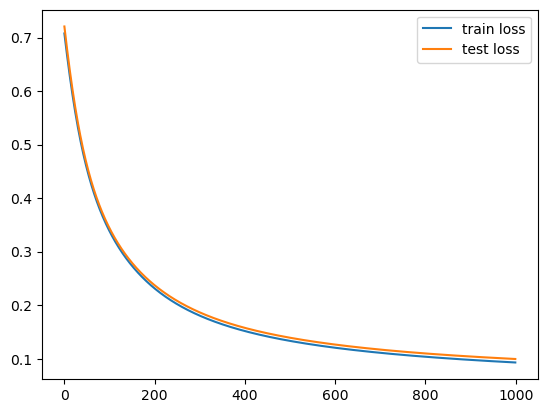

In [271]:
#Plot the train loss and test loss per iteration:
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [277]:
#Get accuracy
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy() > 0)
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy() > 0)
    test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9843, Test acc: 0.9681
